In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("titanic.csv")
df.info()
df.describe()
df.nunique()
df.head()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.fillna(df['Age'].median(),inplace=True)
df.fillna(df['Embarked'].mode()[0],inplace=True)

In [7]:
df.drop('Cabin',axis=1,inplace=True)
df.drop_duplicates(inplace=True)

In [9]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Embarked']=df['Embarked'].astype('category')
df['Sex']=df['Sex'].astype('category')
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.0,891.0,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,2.0,3.0,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,0.0,3.0,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,549.0,491.0,1,577,NaN,NaN,NaN,7,NaN,646
mean,446.000000,NaN,NaN,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,NaN,NaN,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,NaN,NaN,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,NaN,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,NaN,NaN,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


In [13]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [11]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [12]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

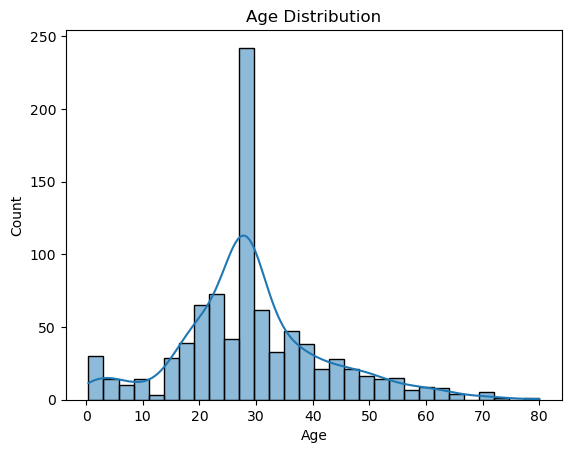

In [15]:
sns.histplot(df['Age'],bins=30,kde=True)
plt.title("Age Distribution")
plt.show()

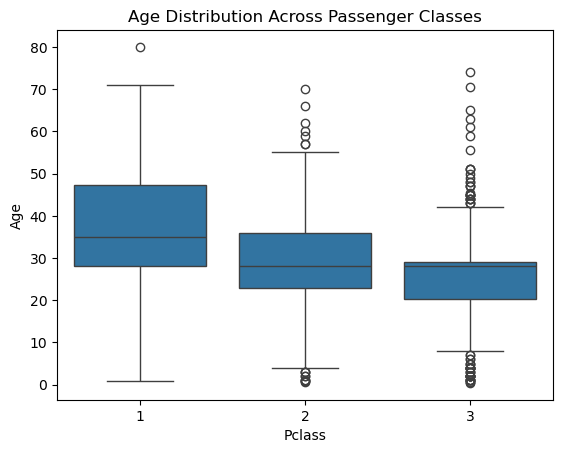

In [16]:
sns.boxplot(x='Pclass',y='Age',data=df)
plt.title("Age Distribution Across Passenger Classes")
plt.show()

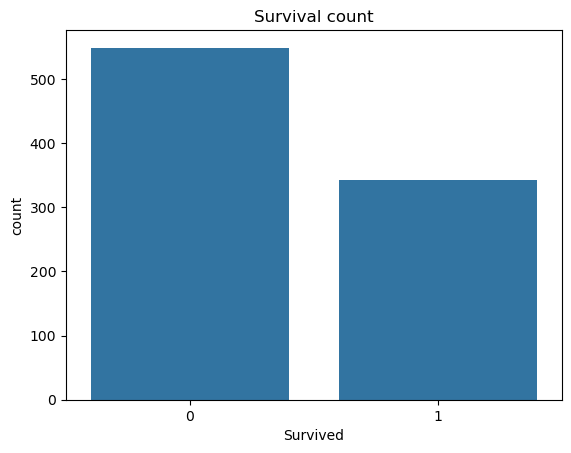

In [17]:
sns.countplot(x='Survived',data=df)
plt.title('Survival count')
plt.show()

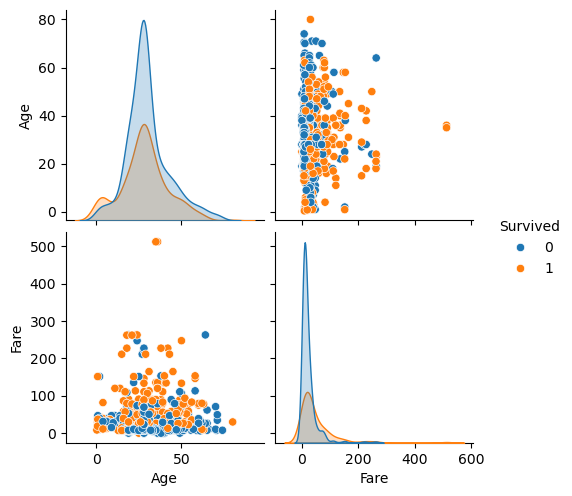

In [18]:
sns.pairplot(df[['Age','Fare','Pclass','Survived']],hue='Survived')
plt.show()

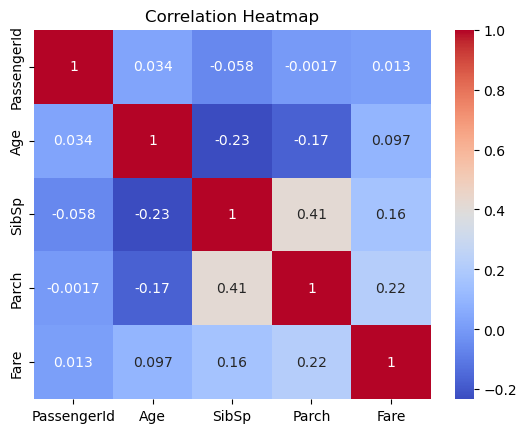

In [19]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [22]:
pd.crosstab(df['Pclass'],df['Survived'],normalize='index')

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363
